In [1]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
DATASET_DIR='/content/gdrive/MyDrive/CVPR/dataset/animal_faces'
TRAIN_DATASET=os.path.join(DATASET_DIR,'train')
TEST_DATASET=os.path.join(DATASET_DIR,'test')

In [3]:
CATEGORIES = []

for i in os.listdir(TRAIN_DATASET):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['dog', 'wild', 'cat']


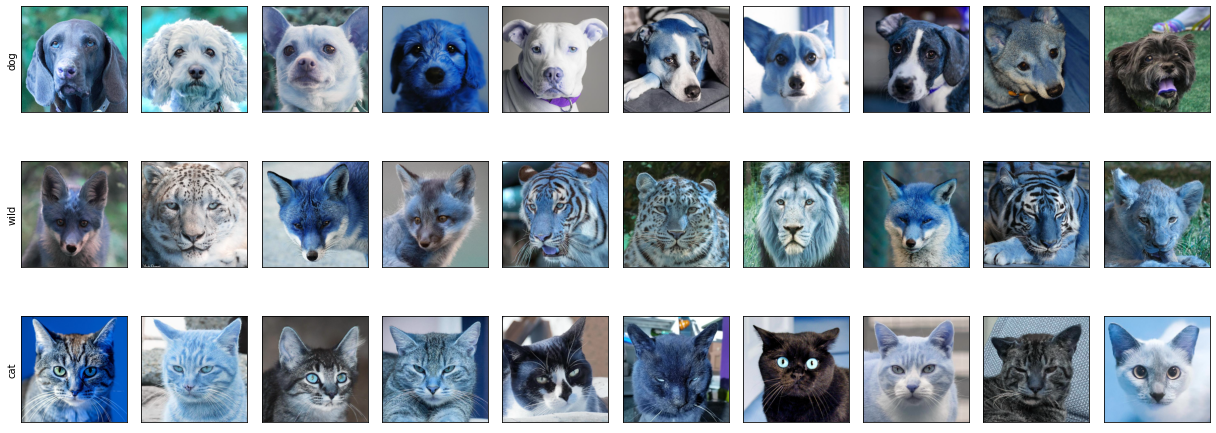

In [4]:
plt.figure(figsize=(17,7))
i=0
for c in CATEGORIES:  
    path = os.path.join(TEST_DATASET,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(3,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show() 

In [5]:
IMG_SIZE = 120
train_data = []
for c in CATEGORIES:
  path = os.path.join(TRAIN_DATASET, c)
  class_num = CATEGORIES.index(c)
  for img in tqdm(os.listdir(path)):
    try:
      img_arr = cv2.imread(os.path.join(path, img))
      img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
      train_data.append([img_resized, class_num])
    except Exception as e:
      pass
print(len(train_data))

100%|██████████| 5153/5153 [01:05<00:00, 78.68it/s]

14630


In [6]:
IMG_SIZE = 120
test_data = []
for c in CATEGORIES:
  path = os.path.join(TEST_DATASET, c)
  class_num = CATEGORIES.index(c)
  for img in tqdm(os.listdir(path)):
    try:
      img_arr = cv2.imread(os.path.join(path, img))
      img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
      test_data.append([img_resized, class_num])
    except Exception as e:
      pass
print(len(test_data))

100%|██████████| 500/500 [00:05<00:00, 89.45it/s] 

1500


In [7]:
X_train = []
Y_train = []

for img, label in train_data:
  X_train.append(img)
  Y_train.append(label)

X_train = np.array(X_train).astype('float32').reshape(-1, 120, 120, 3)
Y_train = np.array(Y_train)
print(X_train.shape, Y_train.shape)

(14630, 120, 120, 3) (14630,)


Text(0, 0.5, '0')

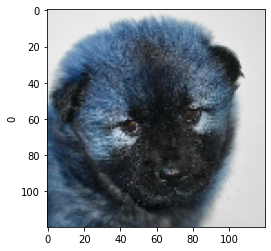

In [8]:
plt.imshow(X_train[400].astype('uint8'))
plt.ylabel(Y_train[400])

In [9]:
X_test = []
Y_test = []

for img, label in test_data:
  X_test.append(img)
  Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, 120, 120, 3)
Y_test = np.array(Y_test)
print(X_test.shape, Y_test.shape)

(1500, 120, 120, 3) (1500,)


In [10]:
X_train = X_train/ 255
X_test = X_test/ 255

In [11]:
model = tf.keras.Sequential([
                             
    tf.keras.Input(shape= (120,120, 3)),

    layers.Conv2D(filters=96, kernel_size=(3,3), strides=(2,2), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=1024),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=512),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(units=256),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(3),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 59, 59, 96)        2688      
                                                                 
 activation (Activation)     (None, 59, 59, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 29, 29, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 384)       332160    
                                                                 
 activation_1 (Activation)   (None, 27, 27, 384)       0

In [12]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [14]:
h = model.fit(x=X_train, y=Y_train, epochs=100, validation_split=0.2, batch_size=64)

Epoch 1/100
183/183 [==============================] - 33s 154ms/step - loss: 0.4942 - accuracy: 0.8099 - val_loss: 0.5019 - val_accuracy: 0.7519
Epoch 2/100
183/183 [==============================] - 25s 136ms/step - loss: 0.1809 - accuracy: 0.9316 - val_loss: 0.0494 - val_accuracy: 0.9891
Epoch 3/100
183/183 [==============================] - 25s 136ms/step - loss: 0.1134 - accuracy: 0.9580 - val_loss: 0.1479 - val_accuracy: 0.9412
Epoch 4/100
183/183 [==============================] - 25s 137ms/step - loss: 0.0913 - accuracy: 0.9689 - val_loss: 0.3420 - val_accuracy: 0.8705
Epoch 5/100
183/183 [==============================] - 25s 136ms/step - loss: 0.0644 - accuracy: 0.9783 - val_loss: 0.1458 - val_accuracy: 0.9515
Epoch 6/100
183/183 [==============================] - 25s 136ms/step - loss: 0.0571 - accuracy: 0.9796 - val_loss: 0.0226 - val_accuracy: 0.9921
Epoch 7/100
183/183 [==============================] - 26s 140ms/step - loss: 0.0477 - accuracy: 0.9827 - val_loss: 0.3725 -

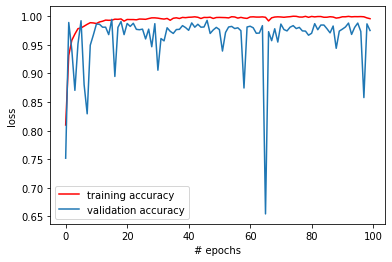

In [16]:
plt.plot(h.history['accuracy'],'r',label='training accuracy')
plt.plot(h.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

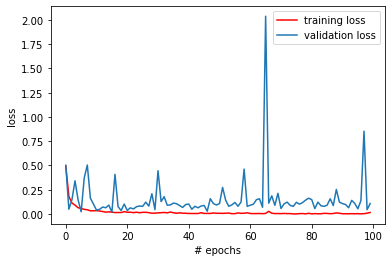

In [17]:
plt.plot(h.history['loss'],'r',label='training loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

47/47 [==============================] - 1s 30ms/step - loss: 0.0948 - accuracy: 0.9760

Test Accuracy: 0.9760000109672546

Test Loss: 0.09480511397123337
